<a href="https://colab.research.google.com/github/Arefe-Ehyaee/ML-based-PCF-SPR-sensor/blob/main/PCF_SPR_Scenario3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive/')

Drive already mounted at /content/MyDrive/; to attempt to forcibly remount, call drive.mount("/content/MyDrive/", force_remount=True).


In [ ]:
%cd /content/MyDrive/MyDrive/Sensor/'Adding more features'/normal_output
%ls

/content/MyDrive/MyDrive/Sensor/Adding more features/normal_output
 alldata.csv                               'ii6mg loss.png'
 i2_mse.png                                'ii6mg Loss-Train-Validation-MSE.png'
 i2.png                                    'ii6mg sa.png'
 i2_regressor.png                          'ii6mg too final4 loss.png'
 i5-Loss-Train-Validation-MSE.png          'ii6mg too final4 sa.png'
'i5mg last loss.png'                        ima_neff_delete/
'i5mg last SA.png'                          newalldata.csv
 i5-vs.png                                 'new fifth55 prediction regressor line.png'
'i6mg  final sixth66   regressor .png'     'new fifth55 Prediction test data split.png'
'i6mg loss.png'                             normal_output_curve.ipynb
'i6mg Loss-Train-Validation-MSE.png'        normal_output.ipynb
'i6mg new Prediction test data split.png'   normal_output_na_cureves.ipynb
'i6mg sa.png'                               normal_output_split_RG.ipynb
'i6mg too final4 

In [ ]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import initializers
import tensorflow as tf
from tensorflow import keras
import os

# **Load Files**

In [ ]:
path = '/content/MyDrive/MyDrive/Sensor/Adding more features/normal_output'
file_path = os.path.join(path, 'newalldata.csv')
print(file_path)
with open(file_path, 'rb') as f:
  all_data_df = pd.read_csv(f)

/content/MyDrive/MyDrive/Sensor/Adding more features/normal_output/newalldata.csv


In [ ]:
all_data_df

,w,na,neff,re(neff),imag(neff),loss,SA(1/RIU),rg(um)
0,0.60,1.31,1.4519323887669042-3.291653714847547E-6i,1.451932,0.000003,3.056809,4.515266,0.3
1,0.62,1.31,1.45091066181998-3.408409361911753E-6i,1.450911,0.000003,3.063131,-12.868908,0.3
2,0.64,1.31,1.4499279284661912-4.654727785503613E-6i,1.449928,0.000005,4.052470,19.683089,0.3
3,0.66,1.31,1.4489779158457035-8.768782197488685E-6i,1.448978,0.000009,7.402882,36.599197,0.3
4,0.68,1.31,1.4480534509365457-2.0683030246449427E-5i,1.448053,0.000021,16.947698,48.733377,0.3
...,...,...,...,...,...,...,...,...
1635,1.32,1.40,1.4232016486184051-4.3126278368817394E-4i,1.423202,0.000431,182.042803,NaN,0.6
1636,1.34,1.40,1.4223850839449483-4.260361546667449E-4i,1.422385,0.000426,177.152433,NaN,0.6
1637,1.36,1.40,1.4215653275687616-4.321107403804846E-4i,1.421565,0.000432,177.036011,NaN,0.6
1638,1.38,1.40,1.4207395188406247-4.471151340129109E-4i,1.420740,0.000447,180.528489,NaN,0.6


In [ ]:
del all_data_df['imag(neff)']

In [ ]:
all_data_df

,w,na,neff,re(neff),loss,SA(1/RIU),rg(um)
0,0.60,1.31,1.4519323887669042-3.291653714847547E-6i,1.451932,3.056809,4.515266,0.3
1,0.62,1.31,1.45091066181998-3.408409361911753E-6i,1.450911,3.063131,-12.868908,0.3
2,0.64,1.31,1.4499279284661912-4.654727785503613E-6i,1.449928,4.052470,19.683089,0.3
3,0.66,1.31,1.4489779158457035-8.768782197488685E-6i,1.448978,7.402882,36.599197,0.3
4,0.68,1.31,1.4480534509365457-2.0683030246449427E-5i,1.448053,16.947698,48.733377,0.3
...,...,...,...,...,...,...,...
1635,1.32,1.40,1.4232016486184051-4.3126278368817394E-4i,1.423202,182.042803,NaN,0.6
1636,1.34,1.40,1.4223850839449483-4.260361546667449E-4i,1.422385,177.152433,NaN,0.6
1637,1.36,1.40,1.4215653275687616-4.321107403804846E-4i,1.421565,177.036011,NaN,0.6
1638,1.38,1.40,1.4207395188406247-4.471151340129109E-4i,1.420740,180.528489,NaN,0.6


In [ ]:
newdf = all_data_df.copy()
newdf['loss_log'] = np.log(newdf['loss'])
newdf['SA(1/RIU)_new_log'] = np.log(newdf['SA(1/RIU)'] + 1000)

newdf['w^2'] = newdf['w'] * newdf['w']
newdf['na ^2'] = newdf['na '] * newdf['na ']
newdf['rg(um)^2'] = newdf['rg(um)'] * newdf['rg(um)']
#------------------------------------------------------------------
newdf['w^3'] = pow(newdf['w'],3)
newdf['na ^3'] = pow(newdf['na '],3)
newdf['rg(um)^3'] = pow(newdf['rg(um)'],3)
#-----------------------------------------------------------------
newdf['w^4'] = pow(newdf['w'],4)
newdf['na ^4'] = pow(newdf['na '],4)
newdf['rg(um)^4'] = pow(newdf['rg(um)'],4)

In [ ]:
newdf

,w,na,neff,re(neff),loss,SA(1/RIU),rg(um),loss_log,SA(1/RIU)_new_log,w^2,na ^2,rg(um)^2,w^3,na ^3,rg(um)^3,w^4,na ^4,rg(um)^4
0,0.60,1.31,1.4519323887669042-3.291653714847547E-6i,1.451932,3.056809,4.515266,0.3,1.117372,6.912260,0.3600,1.7161,0.09,0.216000,2.248091,0.027,0.129600,2.944999,0.0081
1,0.62,1.31,1.45091066181998-3.408409361911753E-6i,1.450911,3.063131,-12.868908,0.3,1.119437,6.894803,0.3844,1.7161,0.09,0.238328,2.248091,0.027,0.147763,2.944999,0.0081
2,0.64,1.31,1.4499279284661912-4.654727785503613E-6i,1.449928,4.052470,19.683089,0.3,1.399326,6.927247,0.4096,1.7161,0.09,0.262144,2.248091,0.027,0.167772,2.944999,0.0081
3,0.66,1.31,1.4489779158457035-8.768782197488685E-6i,1.448978,7.402882,36.599197,0.3,2.001869,6.943701,0.4356,1.7161,0.09,0.287496,2.248091,0.027,0.189747,2.944999,0.0081
4,0.68,1.31,1.4480534509365457-2.0683030246449427E-5i,1.448053,16.947698,48.733377,0.3,2.830132,6.955338,0.4624,1.7161,0.09,0.314432,2.248091,0.027,0.213814,2.944999,0.0081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,1.32,1.40,1.4232016486184051-4.3126278368817394E-4i,1.423202,182.042803,NaN,0.6,5.204242,NaN,1.7424,1.9600,0.36,2.299968,2.744000,0.216,3.035958,3.841600,0.1296
1636,1.34,1.40,1.4223850839449483-4.260361546667449E-4i,1.422385,177.152433,NaN,0.6,5.177011,NaN,1.7956,1.9600,0.36,2.406104,2.744000,0.216,3.224179,3.841600,0.1296
1637,1.36,1.40,1.4215653275687616-4.321107403804846E-4i,1.421565,177.036011,NaN,0.6,5.176353,NaN,1.8496,1.9600,0.36,2.515456,2.744000,0.216,3.421020,3.841600,0.1296
1638,1.38,1.40,1.4207395188406247-4.471151340129109E-4i,1.420740,180.528489,NaN,0.6,5.195889,NaN,1.9044,1.9600,0.36,2.628072,2.744000,0.216,3.626739,3.841600,0.1296


In [ ]:
newdf.isnull().sum()

w                      0
na                     0
neff                   0
re(neff)               0
loss                   0
SA(1/RIU)            164
rg(um)                 0
loss_log               0
SA(1/RIU)_new_log    164
w^2                    0
na ^2                  0
rg(um)^2               0
w^3                    0
na ^3                  0
rg(um)^3               0
w^4                    0
na ^4                  0
rg(um)^4               0
dtype: int64

In [ ]:
newdf = newdf.dropna(axis = 0)
newdf.isnull().sum()

w                    0
na                   0
neff                 0
re(neff)             0
loss                 0
SA(1/RIU)            0
rg(um)               0
loss_log             0
SA(1/RIU)_new_log    0
w^2                  0
na ^2                0
rg(um)^2             0
w^3                  0
na ^3                0
rg(um)^3             0
w^4                  0
na ^4                0
rg(um)^4             0
dtype: int64

In [ ]:
newdf['rg(um)'].value_counts()

0.3    369
0.4    369
0.5    369
0.6    369
Name: rg(um), dtype: int64

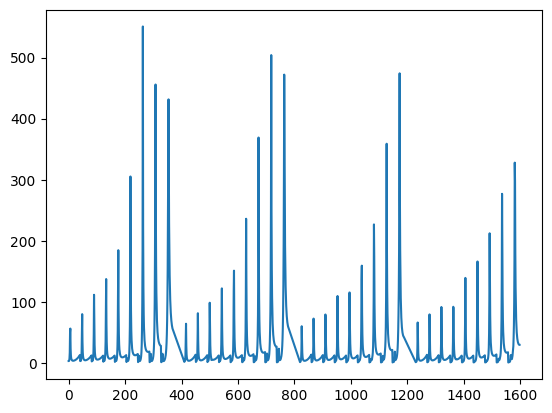

In [ ]:
plt.plot(newdf['loss'])

In [ ]:
newdf[newdf.columns[1]]

0       1.31
1       1.31
2       1.31
3       1.31
4       1.31
        ... 
1594    1.39
1595    1.39
1596    1.39
1597    1.39
1598    1.39
Name: na , Length: 1476, dtype: float64

In [ ]:
na_selection = newdf['na '] == 1.31
rg_selection = newdf['rg(um)'] == 0.4

df_131_4 = newdf.loc[na_selection & rg_selection]

**complite curve**

In [ ]:
na_list = [1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39]
rg_list = [0.3, 0.4, 0.5, 0.6]
data_dict = dict()
for na in na_list:
  for rg in rg_list:
    name = 'na =' + str(na) + ' rg=' + str(rg)
    print(name)

    na_selection = newdf['na '] == na
    rg_selection = newdf['rg(um)'] == rg

    data_dict[name] = newdf.loc[na_selection & rg_selection]

na =1.31 rg=0.3
na =1.31 rg=0.4
na =1.31 rg=0.5
na =1.31 rg=0.6
na =1.32 rg=0.3
na =1.32 rg=0.4
na =1.32 rg=0.5
na =1.32 rg=0.6
na =1.33 rg=0.3
na =1.33 rg=0.4
na =1.33 rg=0.5
na =1.33 rg=0.6
na =1.34 rg=0.3
na =1.34 rg=0.4
na =1.34 rg=0.5
na =1.34 rg=0.6
na =1.35 rg=0.3
na =1.35 rg=0.4
na =1.35 rg=0.5
na =1.35 rg=0.6
na =1.36 rg=0.3
na =1.36 rg=0.4
na =1.36 rg=0.5
na =1.36 rg=0.6
na =1.37 rg=0.3
na =1.37 rg=0.4
na =1.37 rg=0.5
na =1.37 rg=0.6
na =1.38 rg=0.3
na =1.38 rg=0.4
na =1.38 rg=0.5
na =1.38 rg=0.6
na =1.39 rg=0.3
na =1.39 rg=0.4
na =1.39 rg=0.5
na =1.39 rg=0.6


In [ ]:
data_dict['na =1.31 rg=0.3']

,w,na,neff,re(neff),loss,SA(1/RIU),rg(um),loss_log,SA(1/RIU)_new_log,w^2,na ^2,rg(um)^2,w^3,na ^3,rg(um)^3,w^4,na ^4,rg(um)^4
0,0.60,1.31,1.4519323887669042-3.291653714847547E-6i,1.451932,3.056809,4.515266,0.3,1.117372,6.912260,0.3600,1.7161,0.09,0.216000,2.248091,0.027,0.129600,2.944999,0.0081
1,0.62,1.31,1.45091066181998-3.408409361911753E-6i,1.450911,3.063131,-12.868908,0.3,1.119437,6.894803,0.3844,1.7161,0.09,0.238328,2.248091,0.027,0.147763,2.944999,0.0081
2,0.64,1.31,1.4499279284661912-4.654727785503613E-6i,1.449928,4.052470,19.683089,0.3,1.399326,6.927247,0.4096,1.7161,0.09,0.262144,2.248091,0.027,0.167772,2.944999,0.0081
3,0.66,1.31,1.4489779158457035-8.768782197488685E-6i,1.448978,7.402882,36.599197,0.3,2.001869,6.943701,0.4356,1.7161,0.09,0.287496,2.248091,0.027,0.189747,2.944999,0.0081
4,0.68,1.31,1.4480534509365457-2.0683030246449427E-5i,1.448053,16.947698,48.733377,0.3,2.830132,6.955338,0.4624,1.7161,0.09,0.314432,2.248091,0.027,0.213814,2.944999,0.0081
5,0.70,1.31,1.447162756493093-6.299269468976022E-5i,1.447163,50.141533,62.313839,0.3,3.914850,6.968205,0.4900,1.7161,0.09,0.343000,2.248091,0.027,0.240100,2.944999,0.0081
6,0.72,1.31,1.4463681716488488-7.261787216858017E-5i,1.446368,56.197434,4.225553,0.3,4.028871,6.911972,0.5184,1.7161,0.09,0.373248,2.248091,0.027,0.268739,2.944999,0.0081
7,0.74,1.31,1.4455284003448416-3.1244543608567226E-5i,1.445528,23.525991,-239.244891,0.3,3.158106,6.634312,0.5476,1.7161,0.09,0.405224,2.248091,0.027,0.299866,2.944999,0.0081
8,0.76,1.31,1.4446878136945411-1.6700577906842026E-5i,1.444688,12.244001,-185.325562,0.3,2.505036,6.702789,0.5776,1.7161,0.09,0.438976,2.248091,0.027,0.333622,2.944999,0.0081
9,0.78,1.31,1.4438623372322024-1.1082760365136697E-5i,1.443862,7.916966,-122.660728,0.3,2.069008,6.776894,0.6084,1.7161,0.09,0.474552,2.248091,0.027,0.370151,2.944999,0.0081


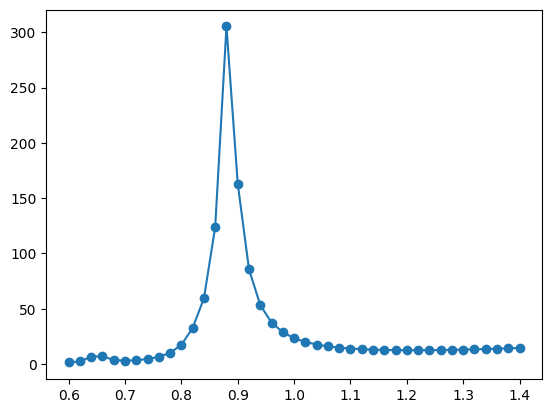

In [ ]:
plt.plot(data_dict[list(data_dict.keys())[20]]['w'], data_dict[list(data_dict.keys())[20]]['loss'], '-o')

In [ ]:
data_dict.keys()

dict_keys(['na =1.31 rg=0.3', 'na =1.31 rg=0.4', 'na =1.31 rg=0.5', 'na =1.31 rg=0.6', 'na =1.32 rg=0.3', 'na =1.32 rg=0.4', 'na =1.32 rg=0.5', 'na =1.32 rg=0.6', 'na =1.33 rg=0.3', 'na =1.33 rg=0.4', 'na =1.33 rg=0.5', 'na =1.33 rg=0.6', 'na =1.34 rg=0.3', 'na =1.34 rg=0.4', 'na =1.34 rg=0.5', 'na =1.34 rg=0.6', 'na =1.35 rg=0.3', 'na =1.35 rg=0.4', 'na =1.35 rg=0.5', 'na =1.35 rg=0.6', 'na =1.36 rg=0.3', 'na =1.36 rg=0.4', 'na =1.36 rg=0.5', 'na =1.36 rg=0.6', 'na =1.37 rg=0.3', 'na =1.37 rg=0.4', 'na =1.37 rg=0.5', 'na =1.37 rg=0.6', 'na =1.38 rg=0.3', 'na =1.38 rg=0.4', 'na =1.38 rg=0.5', 'na =1.38 rg=0.6', 'na =1.39 rg=0.3', 'na =1.39 rg=0.4', 'na =1.39 rg=0.5', 'na =1.39 rg=0.6'])

In [ ]:
len(data_dict.keys())

36

In [ ]:
all_data_df.columns

Index(['w', 'na ', 'neff', 're(neff)', 'loss', 'SA(1/RIU)', 'rg(um)'], dtype='object')

# **Make normal outputs**

In [ ]:
new_data_dict = dict()
for key in data_dict.keys():
  data = data_dict[key].copy()
  data['loss_Q'] =  data['loss'] / data['loss'].abs().max()
  data['SA(1/RIU)_Q'] = data['SA(1/RIU)'] / data['SA(1/RIU)'].abs().max()
  new_data_dict[key] = data

In [ ]:
new_data_dict['na =1.31 rg=0.3'].describe()

,w,na,re(neff),loss,SA(1/RIU),rg(um),loss_log,SA(1/RIU)_new_log,w^2,na ^2,rg(um)^2,w^3,na ^3,rg(um)^3,w^4,na ^4,rg(um)^4,loss_Q,SA(1/RIU)_Q
count,41.000000,4.100000e+01,41.000000,41.000000,41.000000,4.100000e+01,41.000000,41.000000,41.000000,4.100000e+01,4.100000e+01,41.000000,41.000000,4.100000e+01,41.000000,41.000000,41.0000,41.000000,41.000000
mean,1.000000,1.310000e+00,1.435340,9.317439,-19.664407,3.000000e-01,1.920438,6.886207,1.056000,1.716100e+00,9.000000e-02,1.168000,2.248091,2.700000e-02,1.341640,2.944999,0.0081,0.165798,-0.082194
std,0.239583,2.248030e-16,0.009499,10.912397,54.878626,5.620076e-17,0.687070,0.060331,0.481837,2.248030e-16,1.405019e-17,0.758342,0.000000,3.512547e-18,1.100627,0.000000,0.0000,0.194180,0.229383
min,0.600000,1.310000e+00,1.419527,3.056809,-239.244891,3.000000e-01,1.117372,6.634312,0.360000,1.716100e+00,9.000000e-02,0.216000,2.248091,2.700000e-02,0.129600,2.944999,0.0081,0.054394,-1.000000
25%,0.800000,1.310000e+00,1.427490,4.052470,-21.458331,3.000000e-01,1.399326,6.886063,0.640000,1.716100e+00,9.000000e-02,0.512000,2.248091,2.700000e-02,0.409600,2.944999,0.0081,0.072111,-0.089692
50%,1.000000,1.310000e+00,1.435242,5.889681,-3.546844,3.000000e-01,1.773202,6.904202,1.000000,1.716100e+00,9.000000e-02,1.000000,2.248091,2.700000e-02,1.000000,2.944999,0.0081,0.104803,-0.014825
75%,1.200000,1.310000e+00,1.443050,9.567123,3.921136,3.000000e-01,2.258333,6.911669,1.440000,1.716100e+00,9.000000e-02,1.728000,2.248091,2.700000e-02,2.073600,2.944999,0.0081,0.170241,0.016390
max,1.400000,1.310000e+00,1.451932,56.197434,62.313839,3.000000e-01,4.028871,6.968205,1.960000,1.716100e+00,9.000000e-02,2.744000,2.248091,2.700000e-02,3.841600,2.944999,0.0081,1.000000,0.260460


<Axes: >

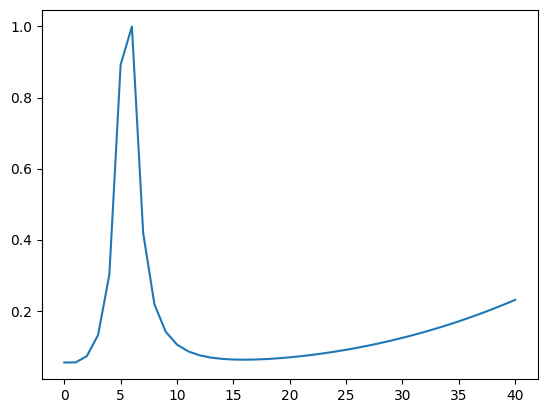

In [ ]:
new_data_dict['na =1.31 rg=0.3']['loss_Q'].plot()

<Axes: >

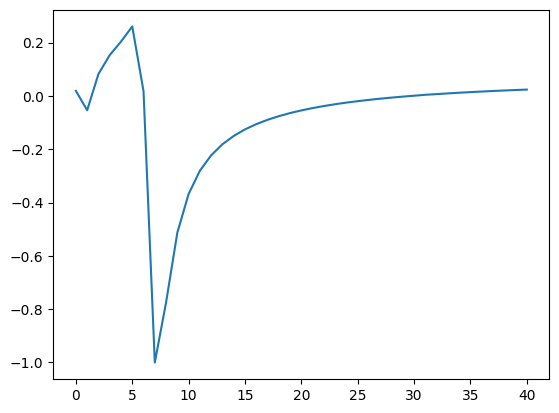

In [ ]:
new_data_dict['na =1.31 rg=0.3']['SA(1/RIU)_Q'].plot()

# **Create new dataframe**

In [ ]:
train_normal_data_df = pd.DataFrame()
test_normal_data_df = pd.DataFrame()
test_index = np.random.randint(0, len(new_data_dict)-1, 4)

for i, key in enumerate(new_data_dict.keys()):
  if i in test_index:
    print("test ", i, key)
    test_normal_data_df = test_normal_data_df.append(new_data_dict[key])
  else:
    train_normal_data_df = train_normal_data_df.append(new_data_dict[key])

test  1 na =1.31 rg=0.4
test  18 na =1.35 rg=0.5
test  29 na =1.38 rg=0.4
test  31 na =1.38 rg=0.6


<ipython-input-77-02e95930bb49>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_normal_data_df = train_normal_data_df.append(new_data_dict[key])
<ipython-input-77-02e95930bb49>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_normal_data_df = test_normal_data_df.append(new_data_dict[key])
<ipython-input-77-02e95930bb49>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_normal_data_df = train_normal_data_df.append(new_data_dict[key])
<ipython-input-77-02e95930bb49>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_normal_data_df = train_normal_data_df.append(new_data_dict[key])
<ipython-input-77-02e95930bb49>:10:

In [ ]:
train_normal_data_df

,w,na,neff,re(neff),loss,SA(1/RIU),rg(um),loss_log,SA(1/RIU)_new_log,w^2,na ^2,rg(um)^2,w^3,na ^3,rg(um)^3,w^4,na ^4,rg(um)^4,loss_Q,SA(1/RIU)_Q
0,0.60,1.31,1.4519323887669042-3.291653714847547E-6i,1.451932,3.056809,4.515266,0.3,1.117372,6.912260,0.3600,1.7161,0.09,0.216000,2.248091,0.027,0.129600,2.944999,0.0081,0.054394,0.018873
1,0.62,1.31,1.45091066181998-3.408409361911753E-6i,1.450911,3.063131,-12.868908,0.3,1.119437,6.894803,0.3844,1.7161,0.09,0.238328,2.248091,0.027,0.147763,2.944999,0.0081,0.054507,-0.053790
2,0.64,1.31,1.4499279284661912-4.654727785503613E-6i,1.449928,4.052470,19.683089,0.3,1.399326,6.927247,0.4096,1.7161,0.09,0.262144,2.248091,0.027,0.167772,2.944999,0.0081,0.072111,0.082272
3,0.66,1.31,1.4489779158457035-8.768782197488685E-6i,1.448978,7.402882,36.599197,0.3,2.001869,6.943701,0.4356,1.7161,0.09,0.287496,2.248091,0.027,0.189747,2.944999,0.0081,0.131730,0.152978
4,0.68,1.31,1.4480534509365457-2.0683030246449427E-5i,1.448053,16.947698,48.733377,0.3,2.830132,6.955338,0.4624,1.7161,0.09,0.314432,2.248091,0.027,0.213814,2.944999,0.0081,0.301574,0.203697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.32,1.39,1.4229503202450096-7.410097895945923E-5i,1.422950,31.279188,-481.993369,0.6,3.442953,6.249988,1.7424,1.9321,0.36,2.299968,2.685619,0.216,3.035958,3.733010,0.1296,0.095397,-0.580339
1595,1.34,1.39,1.4221526626172099-7.32035883551411E-5i,1.422153,30.439186,-481.988075,0.6,3.415731,6.249998,1.7956,1.9321,0.36,2.406104,2.685619,0.216,3.224179,3.733010,0.1296,0.092835,-0.580333
1596,1.36,1.39,1.4213535810163063-7.299525179100927E-5i,1.421354,29.906195,-491.971025,0.6,3.398066,6.230538,1.8496,1.9321,0.36,2.515456,2.685619,0.216,3.421020,3.733010,0.1296,0.091209,-0.592353
1597,1.38,1.39,1.4205530013982923-7.33873498248663E-5i,1.420553,29.631087,-509.253686,0.6,3.388824,6.195927,1.9044,1.9321,0.36,2.628072,2.685619,0.216,3.626739,3.733010,0.1296,0.090370,-0.613162


In [ ]:
test_normal_data_df

,w,na,neff,re(neff),loss,SA(1/RIU),rg(um),loss_log,SA(1/RIU)_new_log,w^2,na ^2,rg(um)^2,w^3,na ^3,rg(um)^3,w^4,na ^4,rg(um)^4,loss_Q,SA(1/RIU)_Q
410,0.60,1.31,1.4519316734563534-1.8320348490397264E-6i,1.451932,1.700000,11.458506,0.4,0.530628,6.919149,0.3600,1.7161,0.16,0.216000,2.248091,0.064,0.129600,2.944999,0.0256,0.026521,0.060500
411,0.62,1.31,1.4509094232009478-2.5947930425369876E-6i,1.450909,2.330000,-2.563634,0.4,0.845868,6.905188,0.3844,1.7161,0.16,0.238328,2.248091,0.064,0.147763,2.944999,0.0256,0.036349,-0.013536
412,0.64,1.31,1.4499272905386937-3.718477602611476E-6i,1.449927,3.240000,14.196026,0.4,1.175573,6.921851,0.4096,1.7161,0.16,0.262144,2.248091,0.064,0.167772,2.944999,0.0256,0.050546,0.074954
413,0.66,1.31,1.4489780556013385-6.650448277199989E-6i,1.448978,5.610000,29.847845,0.4,1.724551,6.937166,0.4356,1.7161,0.16,0.287496,2.248091,0.064,0.189747,2.944999,0.0256,0.087520,0.157596
414,0.68,1.31,1.4480545576514687-1.5187655795435709E-5i,1.448055,12.400000,45.394705,0.4,2.517696,6.952150,0.4624,1.7161,0.16,0.314432,2.248091,0.064,0.213814,2.944999,0.0256,0.193448,0.239682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1.32,1.38,1.422837796366763-3.948781049075201E-5i,1.422838,16.668426,-87.655325,0.6,2.813516,6.816018,1.7424,1.9044,0.36,2.299968,2.628072,0.216,3.035958,3.626739,0.1296,0.060207,-0.134441
1554,1.34,1.38,1.4220390084396228-4.027916677810626E-5i,1.422039,16.748701,-81.740573,0.6,2.818321,6.822480,1.7956,1.9044,0.36,2.406104,2.628072,0.216,3.224179,3.626739,0.1296,0.060497,-0.125369
1555,1.36,1.38,1.4212379860682303-4.127954956354769E-5i,1.421238,16.912254,-76.831512,0.6,2.828038,6.827812,1.8496,1.9044,0.36,2.515456,2.628072,0.216,3.421020,3.626739,0.1296,0.061088,-0.117840
1556,1.38,1.38,1.4204346846045635-4.2476402551214094E-5i,1.420435,17.150394,-72.772046,0.6,2.842021,6.832199,1.9044,1.9044,0.36,2.628072,2.628072,0.216,3.626739,3.626739,0.1296,0.061948,-0.111613


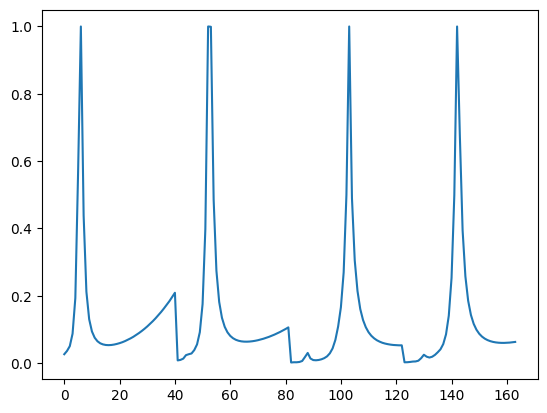

In [ ]:
plt.plot(test_normal_data_df['loss_Q'].values)

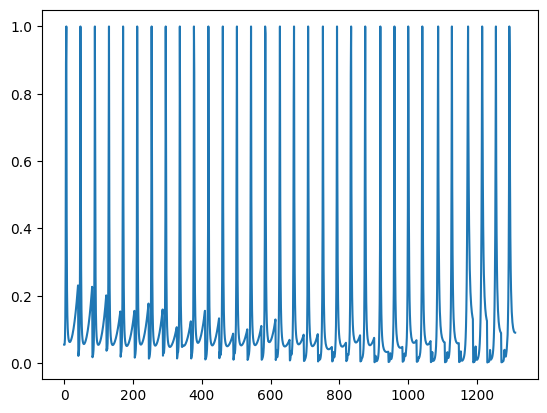

In [ ]:
plt.plot(train_normal_data_df['loss_Q'].values)

In [ ]:
y = train_normal_data_df[['loss_Q','SA(1/RIU)_Q']]
y

,loss_Q,SA(1/RIU)_Q
0,0.054394,0.018873
1,0.054507,-0.053790
2,0.072111,0.082272
3,0.131730,0.152978
4,0.301574,0.203697
...,...,...
1594,0.095397,-0.580339
1595,0.092835,-0.580333
1596,0.091209,-0.592353
1597,0.090370,-0.613162


In [ ]:
newdf.columns

Index(['w', 'na ', 'neff', 're(neff)', 'loss', 'SA(1/RIU)', 'rg(um)',
       'loss_log', 'SA(1/RIU)_new_log', 'w^2', 'na ^2', 'rg(um)^2', 'w^3',
       'na ^3', 'rg(um)^3', 'w^4', 'na ^4', 'rg(um)^4'],
      dtype='object')

In [ ]:
x = train_normal_data_df[['w', 'na ','rg(um)','w^2','na ^2','rg(um)^2','w^3','na ^3','rg(um)^3', 'w^4', 'na ^4', 'rg(um)^4']]
x

,w,na,rg(um),w^2,na ^2,rg(um)^2,w^3,na ^3,rg(um)^3,w^4,na ^4,rg(um)^4
0,0.60,1.31,0.3,0.3600,1.7161,0.09,0.216000,2.248091,0.027,0.129600,2.944999,0.0081
1,0.62,1.31,0.3,0.3844,1.7161,0.09,0.238328,2.248091,0.027,0.147763,2.944999,0.0081
2,0.64,1.31,0.3,0.4096,1.7161,0.09,0.262144,2.248091,0.027,0.167772,2.944999,0.0081
3,0.66,1.31,0.3,0.4356,1.7161,0.09,0.287496,2.248091,0.027,0.189747,2.944999,0.0081
4,0.68,1.31,0.3,0.4624,1.7161,0.09,0.314432,2.248091,0.027,0.213814,2.944999,0.0081
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.32,1.39,0.6,1.7424,1.9321,0.36,2.299968,2.685619,0.216,3.035958,3.733010,0.1296
1595,1.34,1.39,0.6,1.7956,1.9321,0.36,2.406104,2.685619,0.216,3.224179,3.733010,0.1296
1596,1.36,1.39,0.6,1.8496,1.9321,0.36,2.515456,2.685619,0.216,3.421020,3.733010,0.1296
1597,1.38,1.39,0.6,1.9044,1.9321,0.36,2.628072,2.685619,0.216,3.626739,3.733010,0.1296


In [ ]:
x.shape

(1312, 12)

In [ ]:
data_std = x.std()
data_mean = x.mean()

x_norm = (x - x.mean()) / x.std()
x_norm

,w,na,rg(um),w^2,na ^2,rg(um)^2,w^3,na ^3,rg(um)^3,w^4,na ^4,rg(um)^4
0,-1.689664,-1.551773,-1.282018,-1.461859,-1.537127,-1.191621,-1.270481,-1.522521,-1.100932,-1.114483,-1.507960,-1.015952
1,-1.605181,-1.551773,-1.282018,-1.410610,-1.537127,-1.191621,-1.240683,-1.522521,-1.100932,-1.097782,-1.507960,-1.015952
2,-1.520698,-1.551773,-1.282018,-1.357680,-1.537127,-1.191621,-1.208900,-1.522521,-1.100932,-1.079383,-1.507960,-1.015952
3,-1.436215,-1.551773,-1.282018,-1.303071,-1.537127,-1.191621,-1.175066,-1.522521,-1.100932,-1.059177,-1.507960,-1.015952
4,-1.351731,-1.551773,-1.282018,-1.246781,-1.537127,-1.191621,-1.139119,-1.522521,-1.100932,-1.037048,-1.507960,-1.015952
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1.351731,1.601036,1.336572,1.441695,1.614271,1.428126,1.510655,1.627486,1.505109,1.557941,1.640677,1.566267
1595,1.436215,1.601036,1.336572,1.553435,1.614271,1.428126,1.652297,1.627486,1.505109,1.731013,1.640677,1.566267
1596,1.520698,1.601036,1.336572,1.666855,1.614271,1.428126,1.798232,1.627486,1.505109,1.912010,1.640677,1.566267
1597,1.605181,1.601036,1.336572,1.781955,1.614271,1.428126,1.948522,1.627486,1.505109,2.101171,1.640677,1.566267


In [ ]:
n_cols = x.shape[1]
n_cols

12

In [ ]:
# define regression model
def regression_model(lr=0.00001):
    # create model
    #tf.keras.utils.set_random_seed(42)
    init = initializers.RandomNormal(stddev=0.1)
    biass = initializers.Zeros()
    model = Sequential()
    model.add(Dense(12, activation='relu', input_shape=(n_cols,), kernel_initializer=init , bias_initializer = biass))
    model.add(Dense(50, activation='relu', kernel_initializer=init , bias_initializer = biass))
    model.add(Dense(50, activation='relu', kernel_initializer=init , bias_initializer = biass))
    model.add(Dense(50, activation='relu', kernel_initializer=init , bias_initializer = biass))
    model.add(Dense(2, activation = 'linear', kernel_initializer=init , bias_initializer = biass))

    # compile model
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    metric = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
    #loss_log = tf.keras.losses.MeanSquaredLogarithmicError(reduction="auto", name="mean_squared_logarithmic_error")
    model.compile(optimizer=opt, loss=metric , metrics=[metric])
    return model

# **Split dataset**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(x_norm, y, test_size=0.2 , shuffle= True)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(1049, 12)
(1049, 2)
(263, 12)
(263, 2)


In [ ]:
X_test = test_normal_data_df[['w', 'na ','rg(um)','w^2','na ^2','rg(um)^2','w^3','na ^3','rg(um)^3', 'w^4', 'na ^4', 'rg(um)^4']]
X_test = (X_test - data_mean) / data_std
y_test = test_normal_data_df[['loss_Q','SA(1/RIU)_Q']]

In [ ]:
y_train

,loss_Q,SA(1/RIU)_Q
824,0.136209,0.211112
60,0.053815,-0.097052
692,0.045528,-0.072378
894,0.114364,0.004080
1369,0.095959,-0.369041
...,...,...
21,0.072126,-0.045633
605,0.060464,-0.055039
1364,0.978942,0.092332
1323,0.293846,-1.000000


In [ ]:
import time
model = regression_model(0.001)
# fit the model
t0 = time.time()
history2 = model.fit(X_train, y_train, epochs=1000, batch_size=10, validation_data=(X_valid, y_valid))
print("seconds passed: ", time.time()-t0)

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


105/105 [==============================] - 1s 4ms/step - loss: 0.0501 - mean_squared_error: 0.0501 - val_loss: 0.0367 - val_mean_squared_error: 0.0367
Epoch 2/1000
105/105 [==============================] - 0s 3ms/step - loss: 0.0390 - mean_squared_error: 0.0390 - val_loss: 0.0289 - val_mean_squared_error: 0.0290
Epoch 3/1000
105/105 [==============================] - 0s 3ms/step - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.0230 - val_mean_squared_error: 0.0232
Epoch 4/1000
105/105 [==============================] - 0s 3ms/step - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0195 - val_mean_squared_error: 0.0197
Epoch 5/1000
105/105 [==============================] - 0s 3ms/step - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0183 - val_mean_squared_error: 0.0184
Epoch 6/1000
105/105 [==============================] - 0s 3ms/step - loss: 0.0169 - mean_squared_error: 0.0168 - val_loss: 0.0151 - val_mean_squared_error: 0.0154
Epoch 7/1000
105/105 [=======

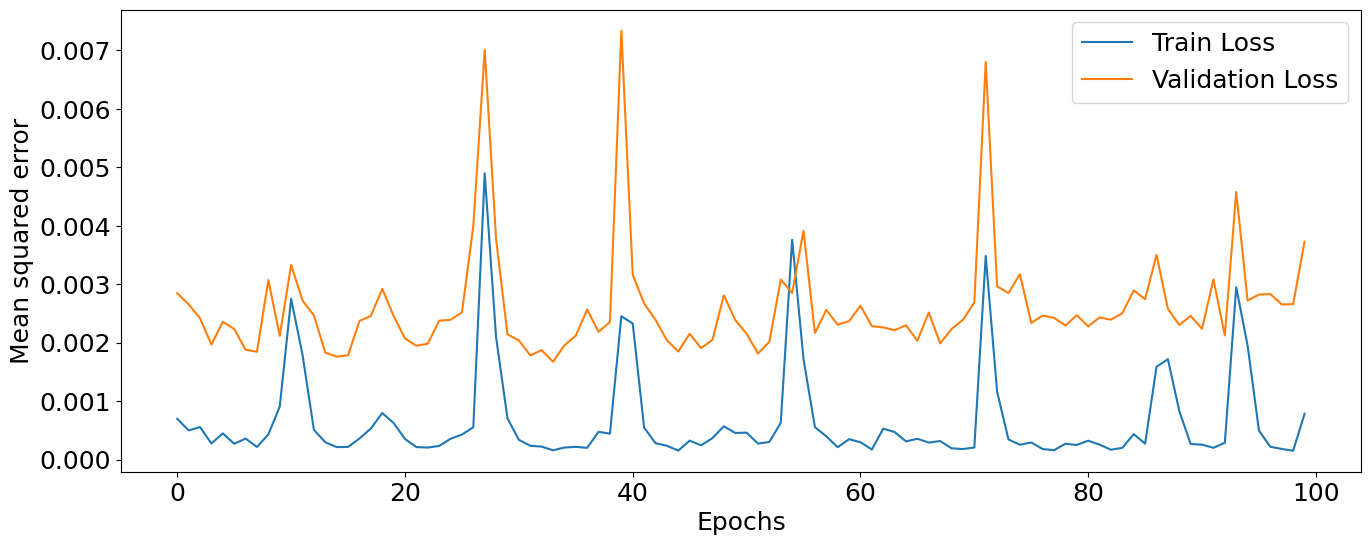

In [ ]:
plt.figure(figsize=(16,6))

plt.plot(history2.history['loss'][900:1000])
plt.plot(history2.history['val_loss'][900:1000])
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)
#plt.set_title('Train Loss',fontsize=18)
plt.xlabel('Epochs',fontsize=18)
plt.ylabel('Mean squared error',fontsize=18)
plt.legend(['Train Loss', 'Validation Loss'], fontsize=18)

#ax[1].plot(history2.history['val_loss'][:1000])
#ax[1].tick_params(axis="x", labelsize=18)
#ax[1].tick_params(axis="y", labelsize=18)
#ax[1].set_title('Validation Loss(MSE)',fontsize=18)
#ax[1].set_xlabel('Epochs',fontsize=18)
#ax[1].set_ylabel('Mean squared error (Loss)',fontsize=18)
#plt.savefig('ii5-Loss-Train-Validation-MSE.png', format='png')

In [ ]:
# evaluation - keras / sklearn
eval = model.evaluate(X_test, y_test, batch_size=1)
eval

164/164 [==============================] - 0s 2ms/step - loss: 0.0033 - mean_squared_error: 0.0033


[0.0033324051182717085, 0.0033324051182717085]

In [ ]:
y_predict_test = model.predict(X_test)

6/6 [==============================] - 0s 3ms/step


In [ ]:
t1 = time.time()
y_predict_test.shape
print("seconds passed: ", time.time()-t1)

seconds passed:  0.00011777877807617188


In [ ]:
y_predict_test.shape

(164, 2)

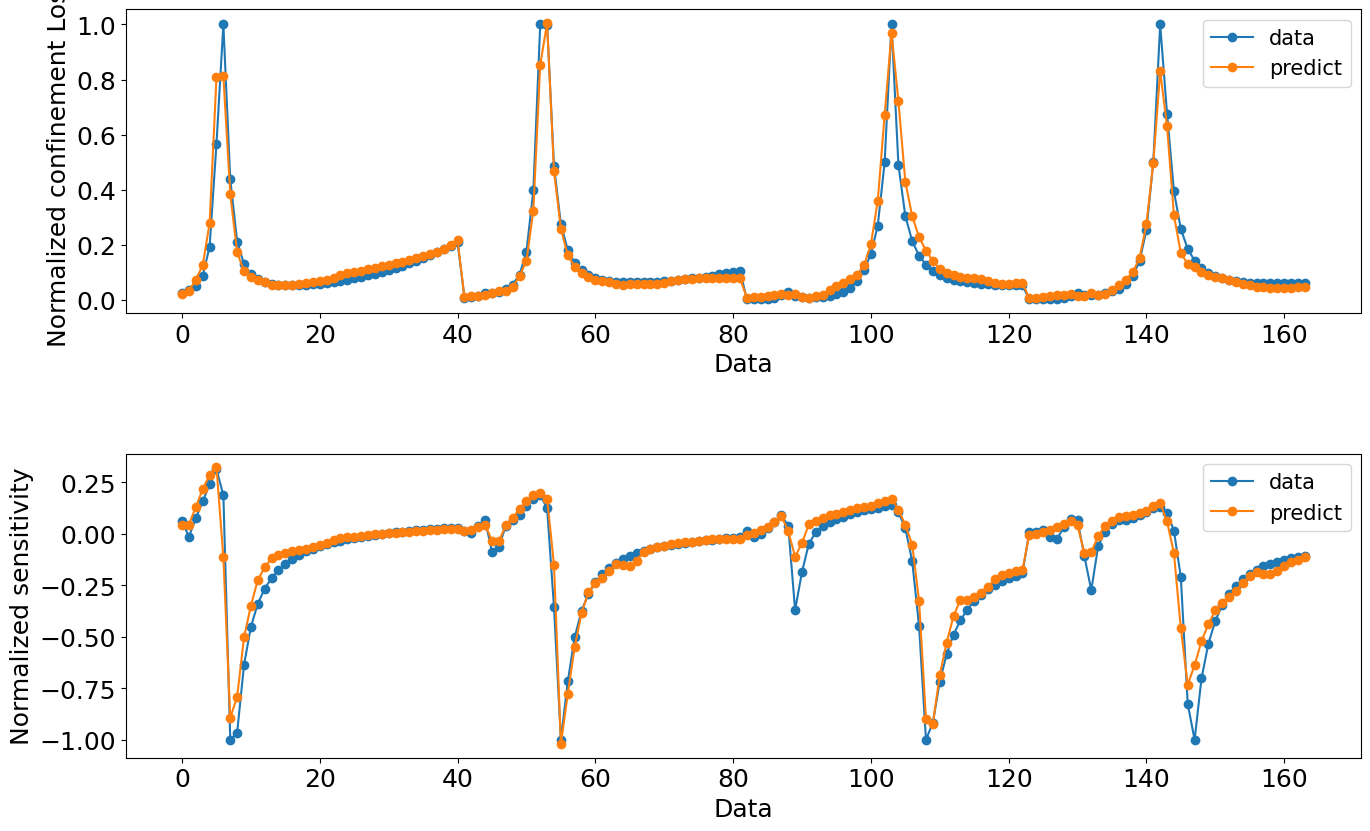

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(15,10))
fig.tight_layout(pad=8.0)

ax[0].tick_params(axis="x", labelsize=18)
ax[0].tick_params(axis="y", labelsize=18)
ax[0].plot(range(len(y_test['loss_Q'])), y_test['loss_Q'], '-o', label='data')
ax[0].plot(range(len(y_test['loss_Q'])), y_predict_test[:,0], '-o', label='predict')
ax[0].set_xlabel('Data',fontsize=18)
ax[0].set_ylabel('Normalized confinement Loss',fontsize=18)
ax[0].legend(prop={'size': 15})

ax[1].tick_params(axis="x", labelsize=18)
ax[1].tick_params(axis="y", labelsize=18)
ax[1].plot(range(len(y_test['SA(1/RIU)_Q'])), y_test['SA(1/RIU)_Q'], '-o', label='data')
ax[1].plot(range(len(y_test['SA(1/RIU)_Q'])), y_predict_test[:,1], '-o', label='predict')
ax[1].set_xlabel('Data',fontsize=18)
ax[1].set_ylabel('Normalized sensitivity',fontsize=18)
ax[1].legend(prop={'size': 15})
#fig.savefig('i5-four-random.png', format='png')

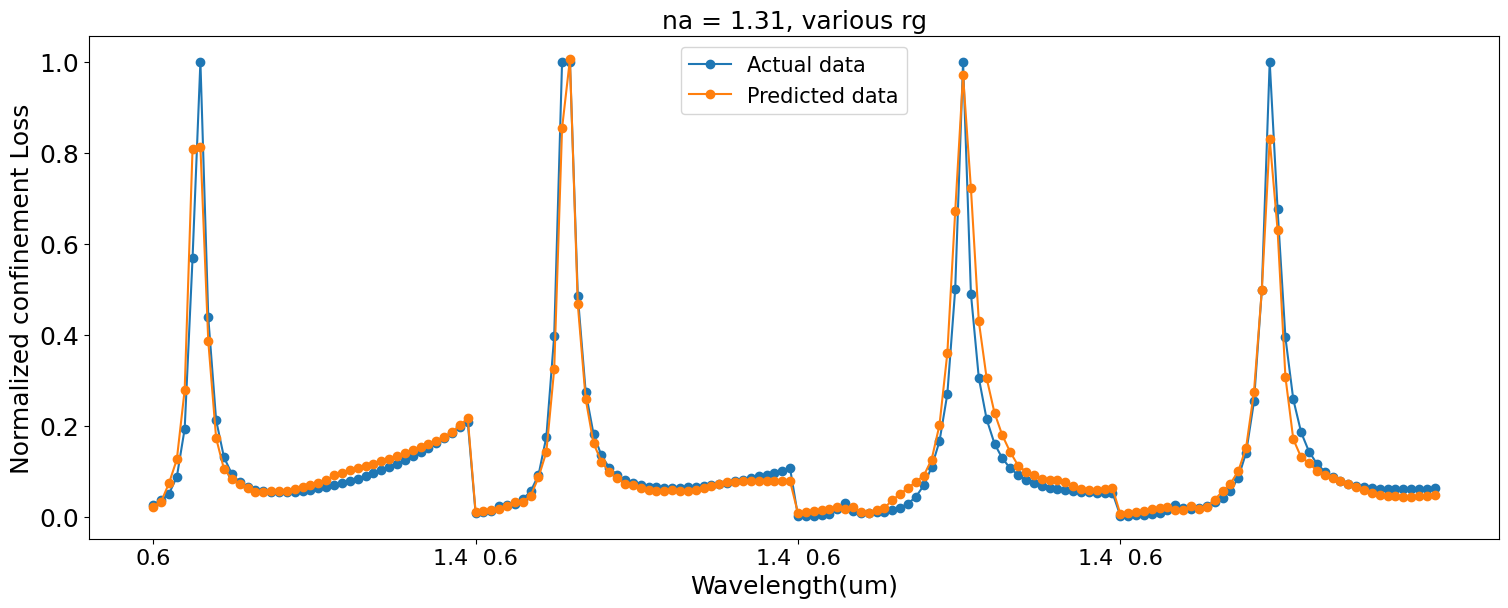

In [ ]:
four_x_labels= [0.6, '1.4  0.6' , '1.4  0.6',  '1.4  0.6']

plt.figure(figsize=(16,7))
plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=18)
plt.plot(range(len(y_test['loss_Q'])), y_test['loss_Q'], '-o', label='Actual data')
plt.plot(range(len(y_test['loss_Q'])), y_predict_test[:,0], '-o', label='Predicted data')
plt.xlabel('Wavelength(um)',fontsize=18)
plt.ylabel('Normalized confinement Loss',fontsize=18)
plt.legend(prop={'size': 15})
plt.xticks(np.arange(0, 160, step=41), four_x_labels)
plt.title('na = 1.31, various rg',fontsize=18)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.tight_layout(pad=4)
plt.savefig('ii5mg last loss')

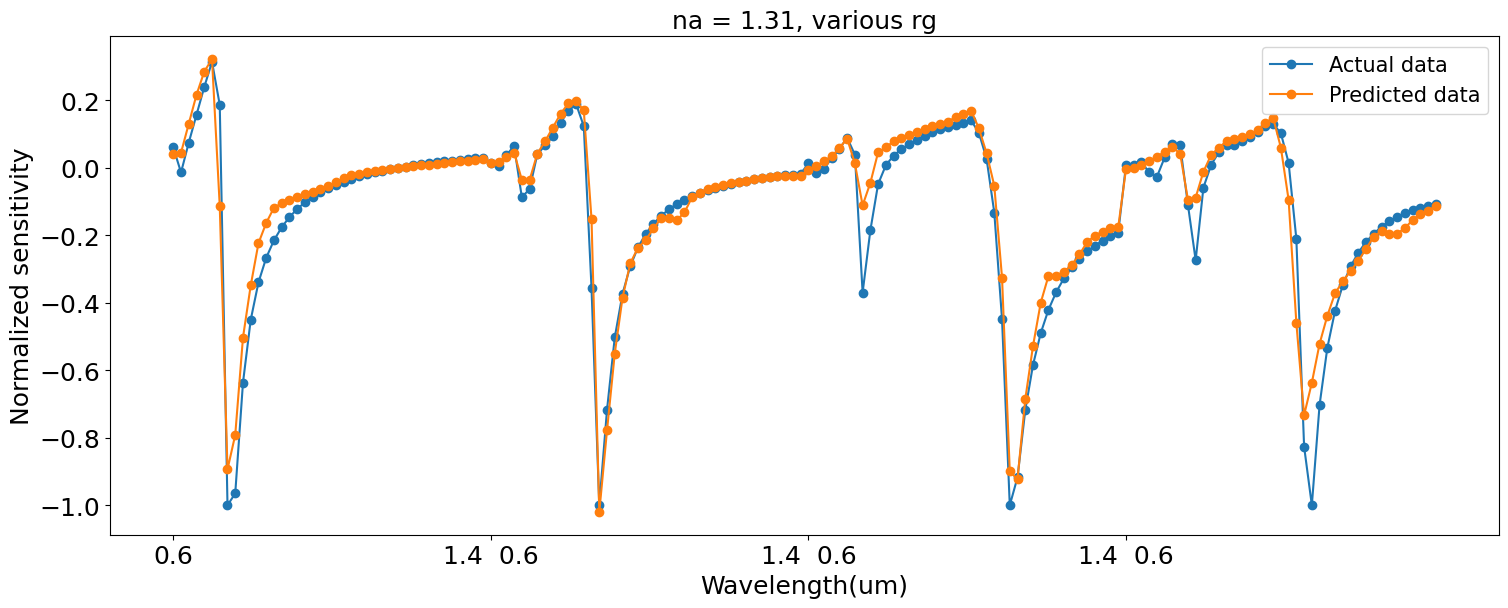

In [ ]:
plt.figure(figsize=(16,7))
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)
plt.plot(range(len(y_test['SA(1/RIU)_Q'])), y_test['SA(1/RIU)_Q'], '-o', label='Actual data')
plt.plot(range(len(y_test['SA(1/RIU)_Q'])), y_predict_test[:,1], '-o', label='Predicted data')
plt.xlabel('Wavelength(um)',fontsize=18)
plt.ylabel('Normalized sensitivity',fontsize=18)
plt.legend(prop={'size': 15})
plt.xticks(np.arange(0, 160, step=41), four_x_labels)
plt.title('na = 1.31, various rg',fontsize=18)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.tight_layout(pad=4)
plt.savefig('ii5mg last SA')

6/6 [==============================] - 0s 2ms/step


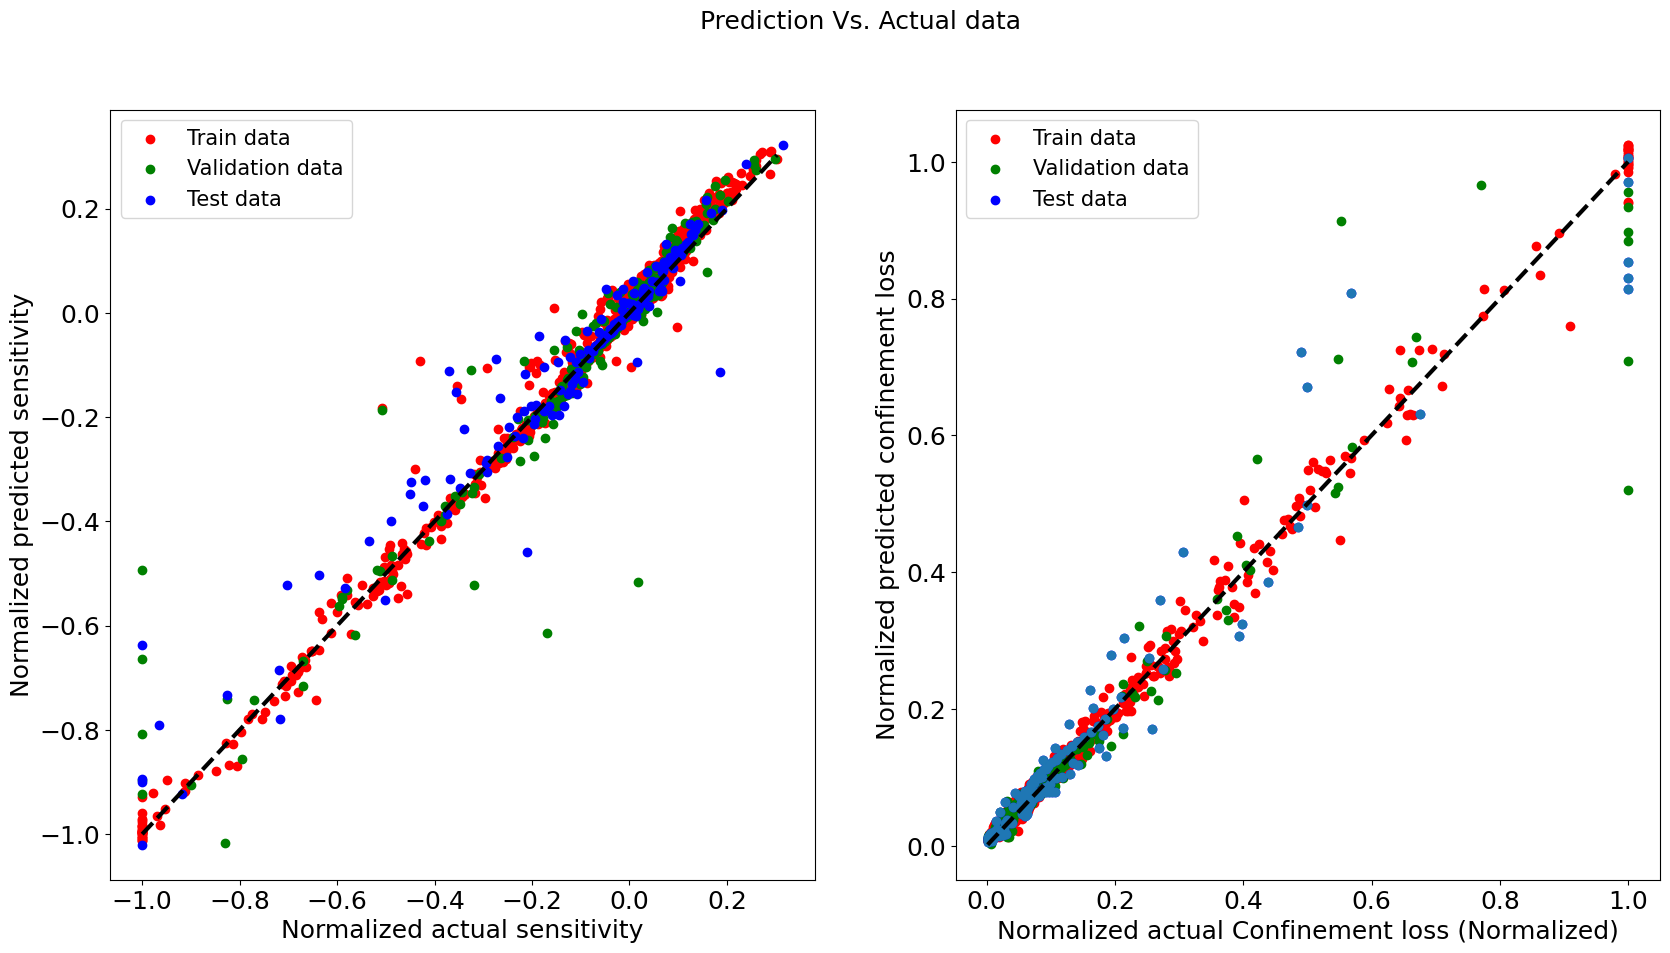

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
fig.suptitle('Prediction Vs. Actual data',fontsize=18)

y_predict_train = model.predict(X_train)
y_predict_valid = model.predict(X_valid)
y_predict_test = model.predict(X_test)

ax[0].tick_params(axis="x", labelsize=18)
ax[0].tick_params(axis="y", labelsize=18)
ax[0].scatter(y_train['SA(1/RIU)_Q'], y_predict_train[:,1], label = 'Train data', color = 'red')
ax[0].scatter(y_valid['SA(1/RIU)_Q'], y_predict_valid[:,1], label = 'Validation data', color = 'green')
ax[0].scatter(y_test['SA(1/RIU)_Q'], y_predict_test[:,1], label = 'Test data', color = 'blue')

ax[0].plot([y['SA(1/RIU)_Q'].min(), y['SA(1/RIU)_Q'].max()], [y['SA(1/RIU)_Q'].min(), y['SA(1/RIU)_Q'].max()], 'k--', lw=3)
ax[0].set_xlabel('Normalized actual sensitivity',fontsize=18)
ax[0].set_ylabel('Normalized predicted sensitivity',fontsize=18)
ax[0].legend(prop={'size': 15})


ax[1].tick_params(axis="x", labelsize=18)
ax[1].tick_params(axis="y", labelsize=18)
ax[1].scatter(y_train['loss_Q'], y_predict_train[:,0], label = 'Train data', color = 'red')
ax[1].scatter(y_valid['loss_Q'], y_predict_valid[:,0], label = 'Validation data',  color = 'green')
ax[1].scatter(y_test['loss_Q'], y_predict_test[:,0], label = 'Test data', color = 'blue')

ax[1].scatter(y_test['loss_Q'], y_predict_test[:,0])
ax[1].plot([y['loss_Q'].min(), y['loss_Q'].max()], [y['loss_Q'].min(), y['loss_Q'].max()], 'k--', lw=3)
ax[1].set_xlabel('Normalized actual Confinement loss (Normalized)',fontsize=18)
ax[1].set_ylabel('Normalized predicted confinement loss',fontsize=18)
ax[1].legend(prop={'size': 15})
fig.savefig('ii5-vs.png', format='png')